<a href="https://colab.research.google.com/github/niranjan-sa/DataScience/blob/master/IEEE_Fraud_Transaction_Complete_EDA_and_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [0]:
#Importing dependancies.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import os

#print (os.listdir('../input/ieee-fraud-detection/.'))

In [2]:
## Colab code
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
## Colab code
os.listdir('My Drive/DataScience/IEEE Fraud Detection/.')

['sample_submission.csv.zip',
 'test_identity.csv.zip',
 'test_transaction.csv.zip',
 'train_transaction.csv.zip',
 'train_identity.csv.zip',
 'Untitled',
 'IEEE Fraud Transaction Complete EDA and Modelling.ipynb']

In [0]:
# Kaggle Kernels
#train_tr = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv', nrows=10)
#train_id = pd.read_csv('../input/ieee-fraud-detection/train_identity.csv', nrows=10)

In [0]:
import warnings
warnings.filterwarnings('ignore')

**# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage**


In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [0]:
## Credits J. Howard, fastai (for this method)
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [0]:
## List of attributes specifically asked for the assignment
attr = [
"TransactionID",
"DeviceType",
"DeviceInfo",
"TransactionDT",
"TransactionAmt",
"ProductCD", 
"card4", 
"card6", 
"P_emaildomain",
"R_emaildomain",
"addr1", 
"addr2", 
"dist1", 
"dist2", 
"isFraud"]

In [0]:
train_tr = pd.read_csv('My Drive/DataScience/IEEE Fraud Detection/train_transaction.csv.zip', nrows=10)
train_id = pd.read_csv('My Drive/DataScience/IEEE Fraud Detection/train_identity.csv.zip', nrows=10)

In [0]:
#Kaggle kernels code
#train_tr = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv', nrows=10)
#train_id = pd.read_csv('../input/ieee-fraud-detection/train_identity.csv', nrows=10)

In [11]:
"""
Looks like, we can fetch, TransactionID, isFraud, TransactionDT, TransactionAmt, ProductCD, card4, card6
P_emaildomain, R_emaildomain, addr1, addr2, dist2, dist2 from 'train_trainsaction.csv'.
"""
display_all(train_tr.head())

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [12]:
"""
We can fetch, DeviceType, DeviceInfo, from 'train_identity.csv'.
"""
display_all(train_id.head())

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


 **Lets read the entire data frames for train data inside.**

In [0]:
train_tr = pd.read_csv('My Drive/DataScience/IEEE Fraud Detection/train_transaction.csv.zip')
train_id = pd.read_csv('My Drive/DataScience/IEEE Fraud Detection/train_identity.csv.zip')

In [0]:
## Lets read the entire data frames for train data inside.
#Training data-only
## Kaggle kernels code
#train_tr = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv')
#train_id = pd.read_csv('../input/ieee-fraud-detection/train_identity.csv')

In [15]:
##Let's check if they both contain same rows
print (train_id.shape)
print (train_tr.shape)

(144233, 41)
(590540, 394)


The above mismatch in the rows shows that **we may not get identity information for all the transactions**. Let's dig deeper into this, by checking the number of unique transaction IDs both record. Besides it's also mentioned in the data description document. 

In [16]:
## Sneak peak into what we loaded
display_all(train_tr.describe())

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.00

In [17]:
display_all(train_id.describe())

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000,127320.000000,80044.000000,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745325,48.053071,-344.507146,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,1.127602,11.774858,93.695502,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,90.000000,10.000000,-660.000000,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,100.000000,49.000000,-360.000000,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,100.000000,64.000000,720.000000,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


The `describe()` function presents data without nulls. So, let's explore null values.

# Null Values (all data)

1.   Find out null values in entire training data set.
2.   Merge two data sets into one frame
3.   Slice data frame to get the subset of our important attributes.
4.   Reduce memory consumption by changing data types.

Let's examine how many null values we have in both the data frames.

In [18]:
display_all(train_id.isna().sum()*100/train_id.shape[0])

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
i

For us, from above, `DeviceType` and `DeviceInfo` are important attributes. They contain nulls, so we will have to deal with them later. 

In [19]:
display_all(train_tr.isna().sum()*100/train_tr.shape[0])

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.512683
card3              0.265012
card4              0.267044
card5              0.721204
card6              0.266028
addr1             11.126427
addr2             11.126427
dist1             59.652352
dist2             93.628374
P_emaildomain     15.994852
R_emaildomain     76.751617
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.214888
D2                47.549192
D3                44.514851
D4                28.604667
D5                52

Looks like a lot of variables have null values. Nevertheless, our primary key to join two dataframes is free of null values. So, let's join and subset our attributes of interest. Therefore, performing an outer join.

In [0]:
data = train_id.merge(train_tr, how='outer', on='TransactionID')

In [21]:
data.shape

(590540, 434)

Our merge operation looks good as number of rows matches the max number of rows among either data frames.

In [22]:
"""
As we no more need earlier data frames, let's clean up our memory.
"""
import gc
train_id = None
train_tr = None
gc.collect()

49

Now let's slice out our data frame and remove the extraneous columns. Therefore, we are free to experiment on our limited data.

In [23]:
df = data[attr]
data = None
gc.collect()

7

Let's check the data types and see if our attributes are represented properly in memory.

In [24]:
display_all(df.dtypes)

TransactionID       int64
DeviceType         object
DeviceInfo         object
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card4              object
card6              object
P_emaildomain      object
R_emaildomain      object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
isFraud             int64
dtype: object

Let's optimize some of the attributes and their data sizes.

In [25]:
df = reduce_mem_usage(df)
display_all(df.dtypes)

Memory usage of dataframe is 72.09 MB --> 46.74 MB (Decreased by 35.2%)


TransactionID       int32
DeviceType         object
DeviceInfo         object
TransactionDT       int32
TransactionAmt    float16
ProductCD          object
card4              object
card6              object
P_emaildomain      object
R_emaildomain      object
addr1             float16
addr2             float16
dist1             float16
dist2             float16
isFraud              int8
dtype: object

Reduced the memory foot-print.

NuLL Values (for our subset)

In [26]:
print (pd.concat([df.isna().sum()*100/df.shape[0], df.dtypes], axis=1))

                        0        1
TransactionID    0.000000    int32
DeviceType      76.155722   object
DeviceInfo      79.905510   object
TransactionDT    0.000000    int32
TransactionAmt   0.000000  float16
ProductCD        0.000000   object
card4            0.267044   object
card6            0.266028   object
P_emaildomain   15.994852   object
R_emaildomain   76.751617   object
addr1           11.126427  float16
addr2           11.126427  float16
dist1           59.652352  float16
dist2           93.628374  float16
isFraud          0.000000     int8


Later, we will refer the above table to impute null values.

In [0]:
Fraud = df.loc[df.isFraud == 1]
notFraud = df.loc[df.isFraud == 0]

In [28]:
print (Fraud.shape)
print (notFraud.shape)

(20663, 15)
(569877, 15)


In [29]:
print (Fraud.shape[0]*100/df.shape[0])
print (notFraud.shape[0]*100/df.shape[0])

3.499000914417313
96.50099908558269


**This is one of the most important observations. We have a highly unbalanced dataset. The proportion of fraud transactions is too less.**

# Visualizations and EDA

**Class distribution**

Text(0.5, 0, 'isFraud')

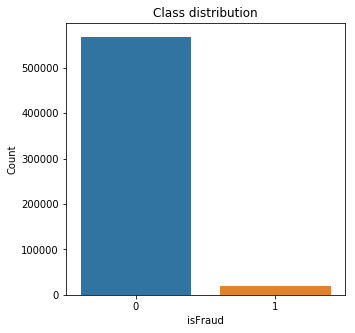

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

sns.set_style('whitegrid')
sns.countplot(x='isFraud', data=df, ax=ax)
plt.title("Class distribution")
plt.ylabel("Count")     
plt.xlabel("isFraud")            

Let's look into data and see if we find any interesting patters. Categorical variables First!!

Let's treat the null values (for `object` type) let's fill it by `null` string. and visualize.

In [0]:
##Null treatment
df['DeviceType'].fillna(value='na', inplace=True)

**Device type distribution**

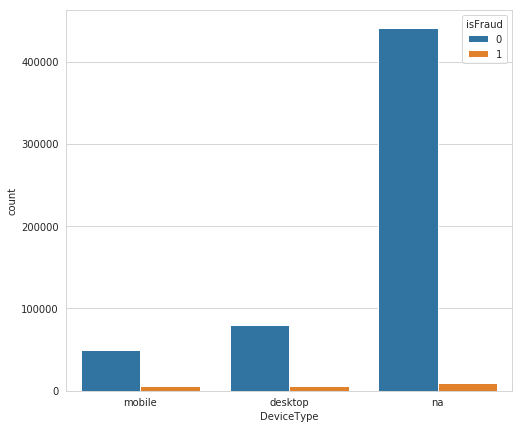

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(8, 7)
plt.ylabel("Count in K")     
g = sns.countplot(x=df['DeviceType'], hue=df['isFraud'], ax=ax)
plt.show()

* There seem to be a lot of desktop devices. 

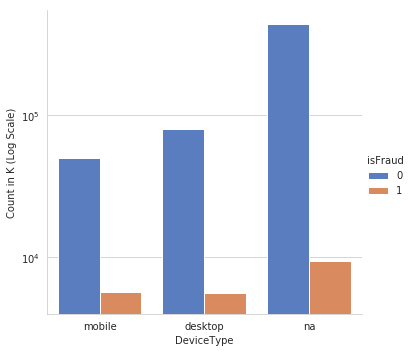

In [33]:
g = sns.factorplot(x="DeviceType", hue="isFraud", kind='count',
                   data=df, palette="muted", log=True)
plt.ylabel("Count in K (Log Scale)")  
g.fig.get_axes()[0].set_yscale('log')

**DeviceInfo distributions**

In [0]:
## Null values filled. 
df['DeviceInfo'].fillna(value='na', inplace=True)
dev_info = df.DeviceInfo.value_counts()[0:10]

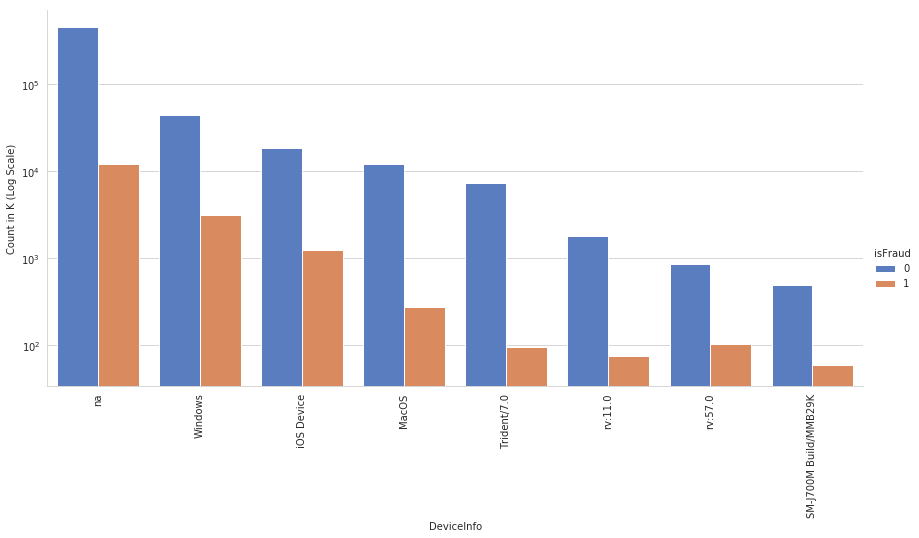

In [35]:
g = sns.factorplot(x="DeviceInfo", hue="isFraud", kind='count', orient='v',
                   data=df, palette="muted", log=True, order=df.DeviceInfo.value_counts().iloc[:8].index, size=6, aspect=2)

g.set_xticklabels(rotation=90)
plt.ylabel("Count in K (Log Scale)")  
g.fig.get_axes()[0].set_yscale('log')

**It is interesting to note that, for popular platforms, like windows and iOS, more that half of the transactions look fradulent.** After some interesting google searches, we find that names with SM- prefix are all samsung devices. So let's group them into one class. Additionall, Trident refers to IExplorer engine. There is a tough decison here as some specific devices version would be vulnerable to frauds while others may not. So, let's postpone our decision of clubbing devices together. Surprisingly, I couldn't find `Android` in top 20. Strange!!

In [36]:
display_all(df.DeviceInfo.value_counts().iloc[:20])

na                             471874
Windows                         47722
iOS Device                      19782
MacOS                           12573
Trident/7.0                      7440
rv:11.0                          1901
rv:57.0                           962
SM-J700M Build/MMB29K             549
SM-G610M Build/MMB29K             461
SM-G531H Build/LMY48B             410
rv:59.0                           362
SM-G935F Build/NRD90M             334
SM-G955U Build/NRD90M             328
SM-G532M Build/MMB29T             316
ALE-L23 Build/HuaweiALE-L23       312
SM-G950U Build/NRD90M             290
SM-G930V Build/NRD90M             274
rv:58.0                           269
rv:52.0                           256
SAMSUNG                           235
Name: DeviceInfo, dtype: int64

**Transaction amounts**

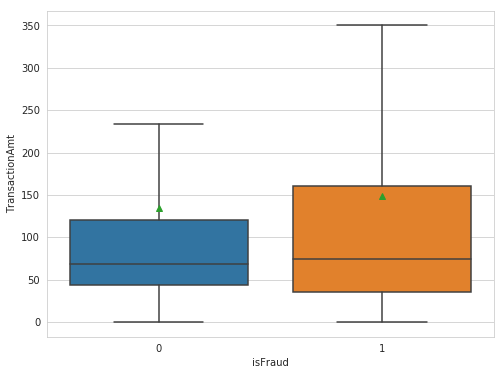

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.boxplot(y='TransactionAmt', x='isFraud', data=pd.DataFrame({'TransactionAmt':df['TransactionAmt'], 'isFraud':df['isFraud']}), ax=ax, showfliers=False, showmeans=True)

The above box plot is showing values without outliers. Therefore, we can see that the `IQR range` of `fradulent transactions` is `more` than that of the `legitimate transactions`. The `green triangles` show the mean of the legit and fradulent transactions.

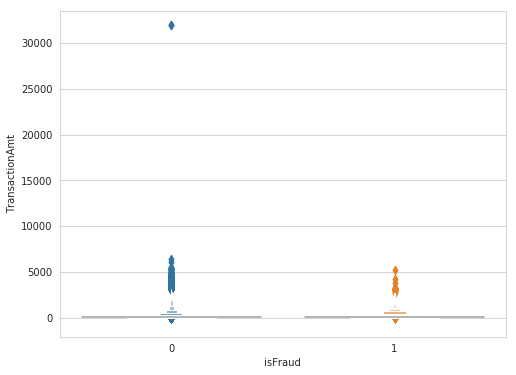

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.boxenplot(y='TransactionAmt', x='isFraud', data=pd.DataFrame({'TransactionAmt':df['TransactionAmt'], 'isFraud':df['isFraud']}), ax=ax)

From the above graph it is clear that, if the amount is very huge (above say 20K), it's highly likely that the transaction is not fraud or is legitimate. To visualize it properly, we use log scales. 

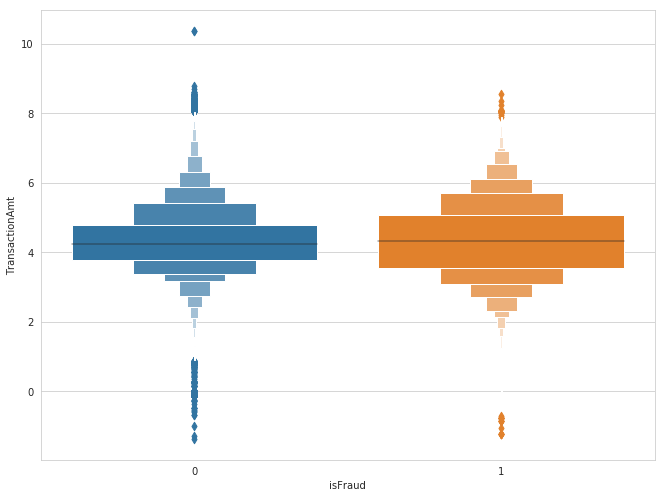

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8.27)
sns.boxenplot(y='TransactionAmt', x='isFraud', data=pd.DataFrame({'TransactionAmt':np.log(df['TransactionAmt']), 'isFraud':df['isFraud']}), ax=ax)

**From the above plot it is clear that the fraud transactions have a wider range from 1st quartile to 3rd quartile. There are a lot of outliers in the legitimate transactions.**

# Answer to Q-3

**Product CD**

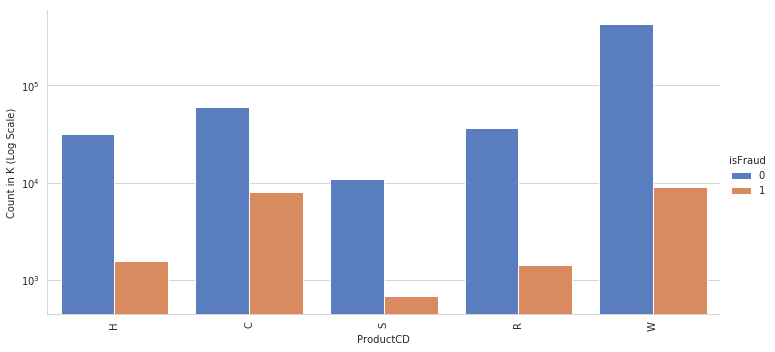

In [40]:
g = sns.factorplot(x="ProductCD", hue="isFraud", kind='count', orient='v',
                   data=df, palette="muted", log=True,  size=5, aspect=2)

g.set_xticklabels(rotation=90)
plt.ylabel("Count in K (Log Scale)")  
g.fig.get_axes()[0].set_yscale('log')

Prima facia, from the above plot it appears that products with `ProductCD = S` and `R` are expensive products as they are low in numbers. Also, premium products like high range smart phones and devices have additional technologies like NFCs etc. for fraud protections. Nevertheless, let's match this information with the info in column `DeciceType`, `DeviceInfo` and `TransactionAmt` and see what we unviel.

**Product CD vs. Transaction Amount**

Text(23.56884982638889, 0.5, 'Transaction Amount')

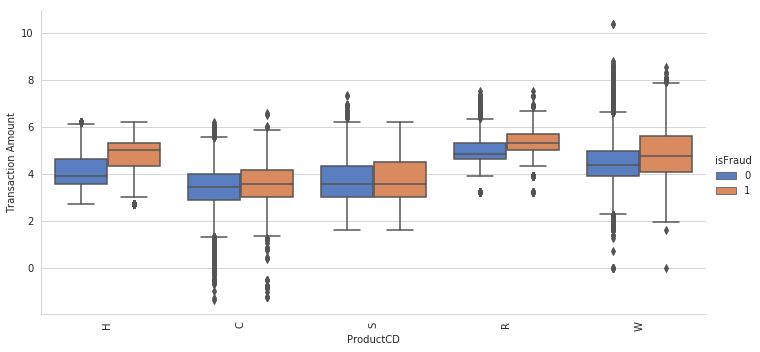

In [41]:
g = sns.factorplot(x="ProductCD", y='TransactionAmt' ,hue="isFraud", kind='box', orient='v',
                   data=pd.DataFrame({'TransactionAmt':np.log(df['TransactionAmt']), 'isFraud':df['isFraud'], 'ProductCD': df['ProductCD']}), palette="muted",   size=5, aspect=2)

g.set_xticklabels(rotation=90)
plt.ylabel("Transaction Amount")

**From the above plot it is clear that, product category `R` has relatively higher transaction amounts in percentiles. So, premium product users are likely to transact on higher amounts. This is also true for category `H`**

> Let's check device info for the different Product CDs

In [0]:
#data = df.groupby(['ProductCD', 'DeviceInfo', 'isFraud']).sum()
#print (data.shape)

In [0]:
#data.head()

# Visualizations and EDA (contd.)

In [0]:
df['card4'].fillna(value='na', inplace=True)

(5,)


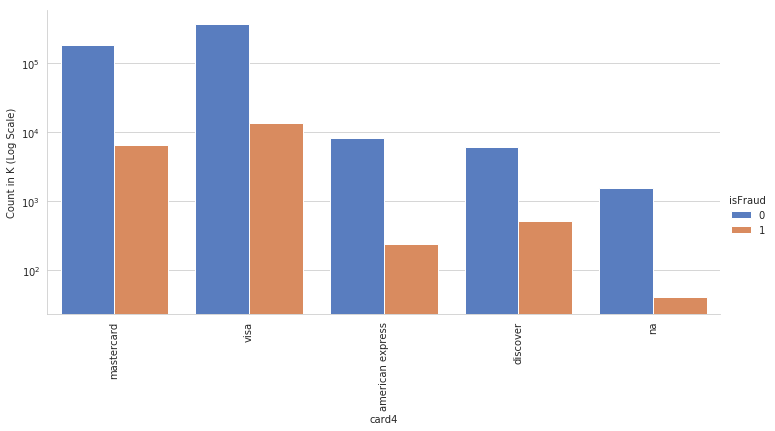

In [45]:
print (df.card4.unique().shape)

g = sns.factorplot(x="card4", hue="isFraud", kind='count', orient='v',
                   data=df, palette="muted", log=True,  size=5, aspect=2)

g.set_xticklabels(rotation=90)
plt.ylabel("Count in K (Log Scale)")  
g.fig.get_axes()[0].set_yscale('log')

Looks like `american experess` is a pro when it comes to preventing fradulent transactions. They have relatively lower rate as compared to others. It is followed by `discover`. We have replaced .26 percent of missing values as `na`

In [0]:
df['card6'].fillna(value='na', inplace=True)

(5,)


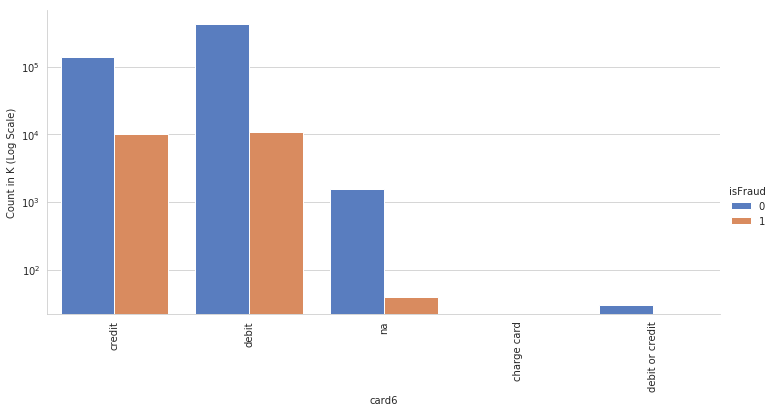

In [47]:
print (df['card6'].unique().shape)

g = sns.factorplot(x="card6", hue="isFraud", kind='count', orient='v',
                   data=df, palette="muted", log=True,  size=5, aspect=2)

g.set_xticklabels(rotation=90)
plt.ylabel("Count in K (Log Scale)")  
g.fig.get_axes()[0].set_yscale('log')

In [0]:
df['P_emaildomain'].fillna(value='na', inplace=True)

In [49]:
print (df.P_emaildomain.unique().shape)
display_all(df.P_emaildomain.value_counts())

(60,)


gmail.com           228355
yahoo.com           100934
na                   94456
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
n

(60,)


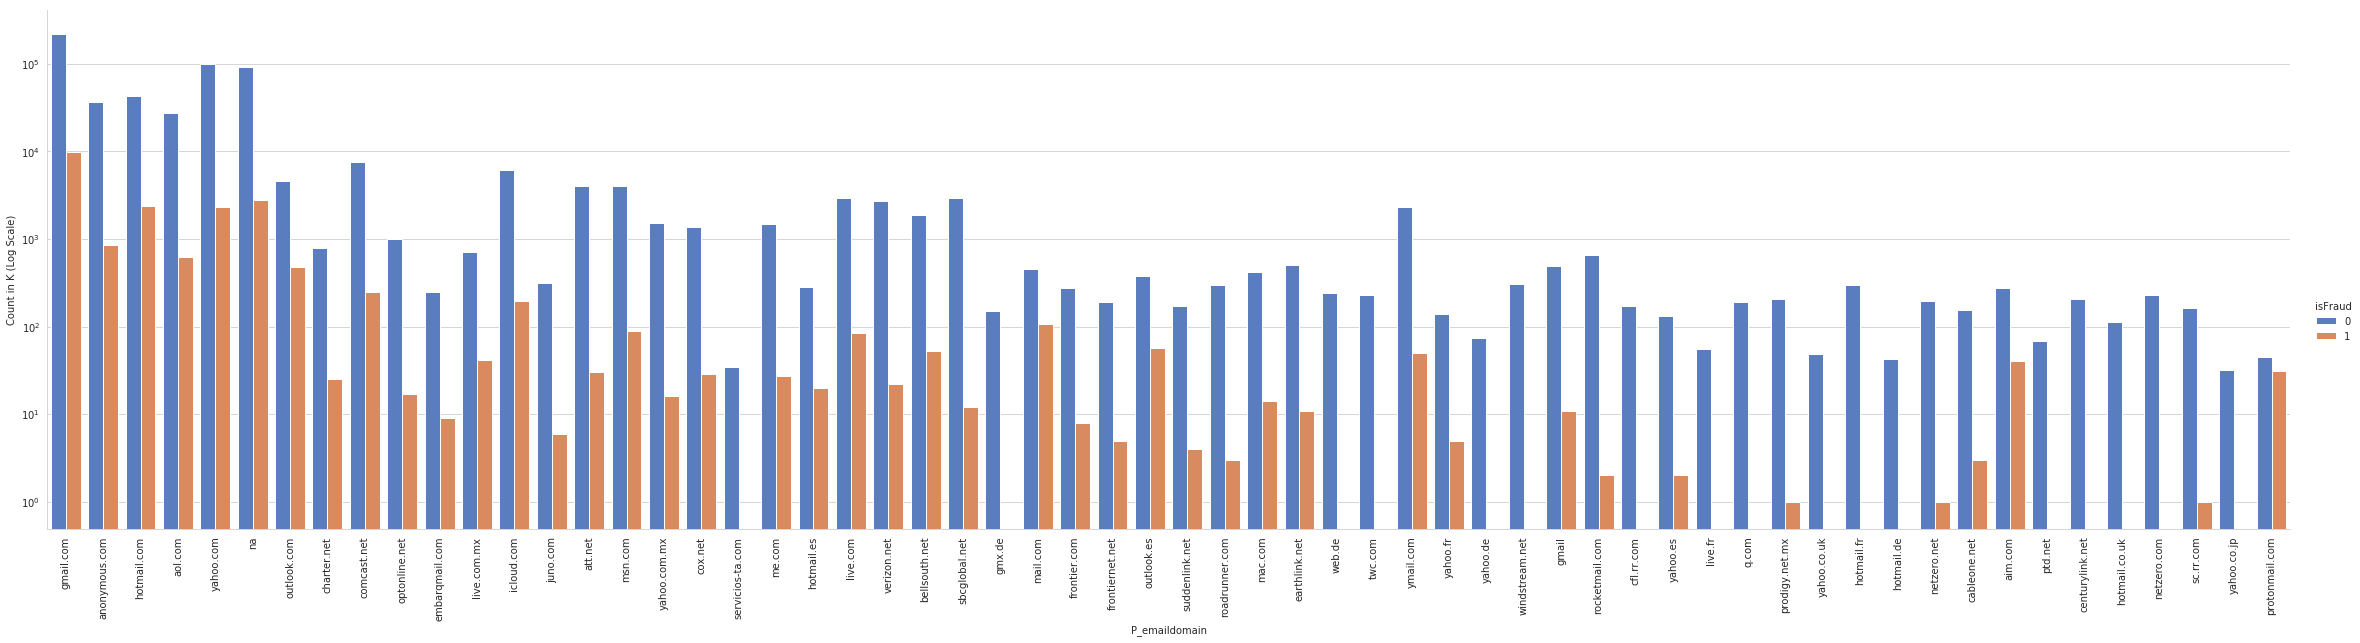

In [50]:
print (df['P_emaildomain'].unique().shape)

g = sns.factorplot(x="P_emaildomain", hue="isFraud", kind='count', orient='v',
                   data=df, palette="muted", log=True,  size=8, aspect=4)

g.set_xticklabels(rotation=90)
plt.ylabel("Count in K (Log Scale)")  
g.fig.get_axes()[0].set_yscale('log')

**Interestingly, from the above plot we can see that, for emails from some domains, there are almost no fradulent transactions. So, it would make a great attribute for classification**

**R_emaildomain**

In [0]:
df['R_emaildomain'].fillna(value='na', inplace=True)

In [52]:
print (df.R_emaildomain.unique().shape)
display_all(df.R_emaildomain.value_counts())

(61,)


na                  453249
gmail.com            57147
hotmail.com          27509
anonymous.com        20529
yahoo.com            11842
aol.com               3701
outlook.com           2507
comcast.net           1812
yahoo.com.mx          1508
icloud.com            1398
msn.com                852
live.com               762
live.com.mx            754
verizon.net            620
me.com                 556
sbcglobal.net          552
cox.net                459
outlook.es             433
att.net                430
bellsouth.net          422
hotmail.fr             293
hotmail.es             292
web.de                 237
mac.com                218
ymail.com              207
prodigy.net.mx         207
optonline.net          187
gmx.de                 147
yahoo.fr               137
charter.net            127
mail.com               122
hotmail.co.uk          105
gmail                   95
earthlink.net           79
yahoo.de                75
rocketmail.com          69
embarqmail.com          68
s

(61,)


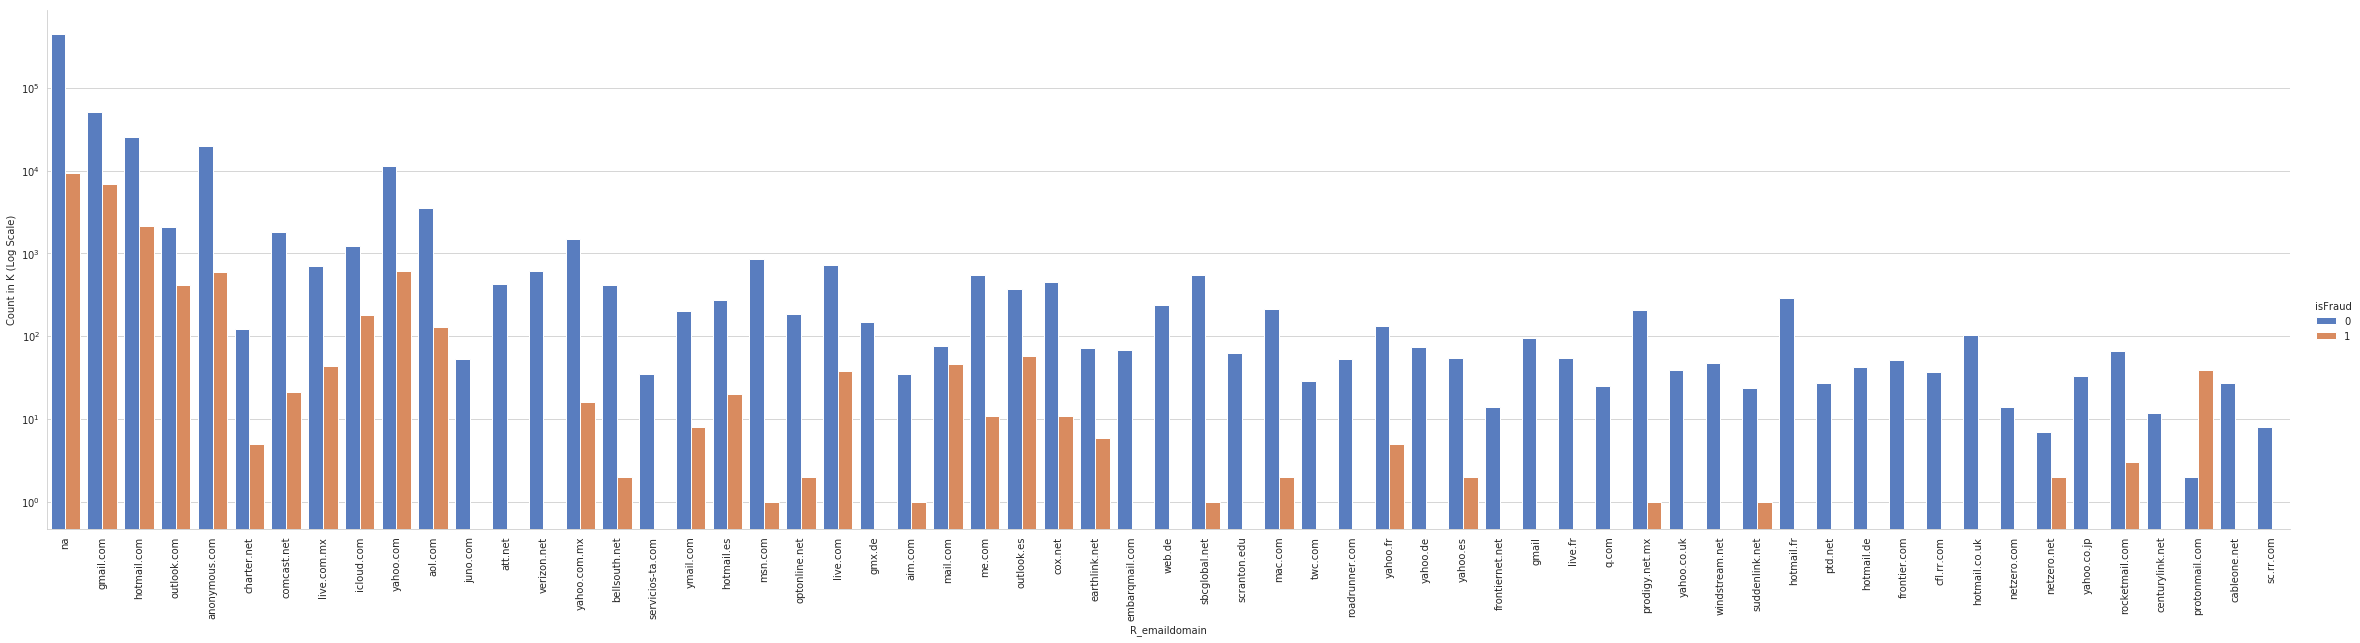

In [53]:
print (df['R_emaildomain'].unique().shape)

g = sns.factorplot(x="R_emaildomain", hue="isFraud", kind='count', orient='v',
                   data=df, palette="muted", log=True,  size=8, aspect=4)

g.set_xticklabels(rotation=90)
plt.ylabel("Count in K (Log Scale)")  
g.fig.get_axes()[0].set_yscale('log')

**One probable reason for huge no of NAs in this field could be that, the receivers could have been getting money, just based on a/c no. as email, might not be mandated.**

**addr1**    
This looks like a categorical variable, so let's convert it to a string variable. 

In [54]:
df['addr1'] = df.addr1.astype('str')
df['addr1'].fillna(value='nan', inplace=True)
print (df.addr1.unique().shape)
print (df.addr1.value_counts().head(20))

(333,)
nan      65706
299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
315.0    23078
441.0    20827
272.0    20141
123.0    16105
126.0    15243
184.0    15160
337.0    15149
191.0    14979
181.0    13856
143.0     9806
476.0     9478
310.0     8486
472.0     8478
327.0     8425
Name: addr1, dtype: int64


Let's plot top countries with fradulent transactions

In [0]:
# Group by operation trial
temp = df.groupby(['addr1','isFraud']).size()
temp = temp.unstack()
temp.fillna(value=0, inplace=True)

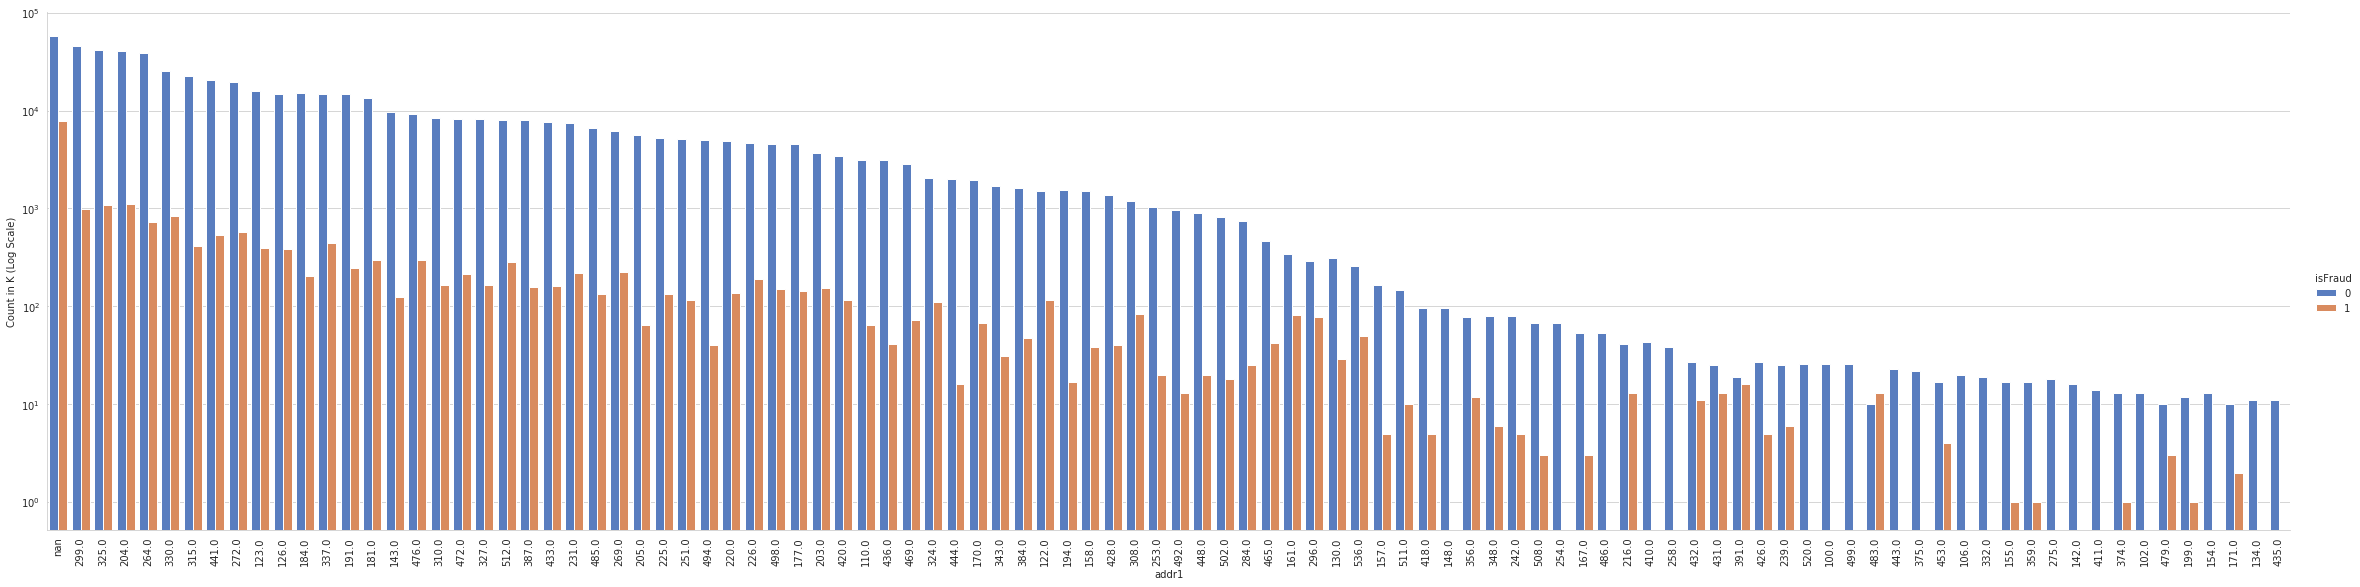

In [56]:
g = sns.factorplot(x="addr1", hue="isFraud", kind='count', orient='v',
                   data=df, palette="muted", log=True, order=df.addr1.value_counts().iloc[:100].index, size=8, aspect=4)

g.set_xticklabels(rotation=90)
plt.ylabel("Count in K (Log Scale)")  
g.fig.get_axes()[0].set_yscale('log')

From the above graph, we can see that some `addr1` locations have a lower rate of fradulent transactions that others. Eg. `410.0`, `486.0` have a lower chance as compared to other addresses with comparable legit transactions, like `384`, `282`

In [57]:
df['addr2'] = df.addr2.astype('str')
df['addr2'].fillna(value='nan', inplace=True)
print (df.addr2.unique().shape)
print (df.addr2.value_counts().head(20))

(75,)
87.0     520481
nan       65706
60.0       3084
96.0        638
32.0         91
65.0         82
16.0         55
31.0         47
19.0         33
26.0         25
27.0         20
69.0         17
59.0         17
34.0         16
43.0         12
102.0        11
29.0         11
98.0         11
68.0         10
57.0         10
Name: addr2, dtype: int64


**addr2**

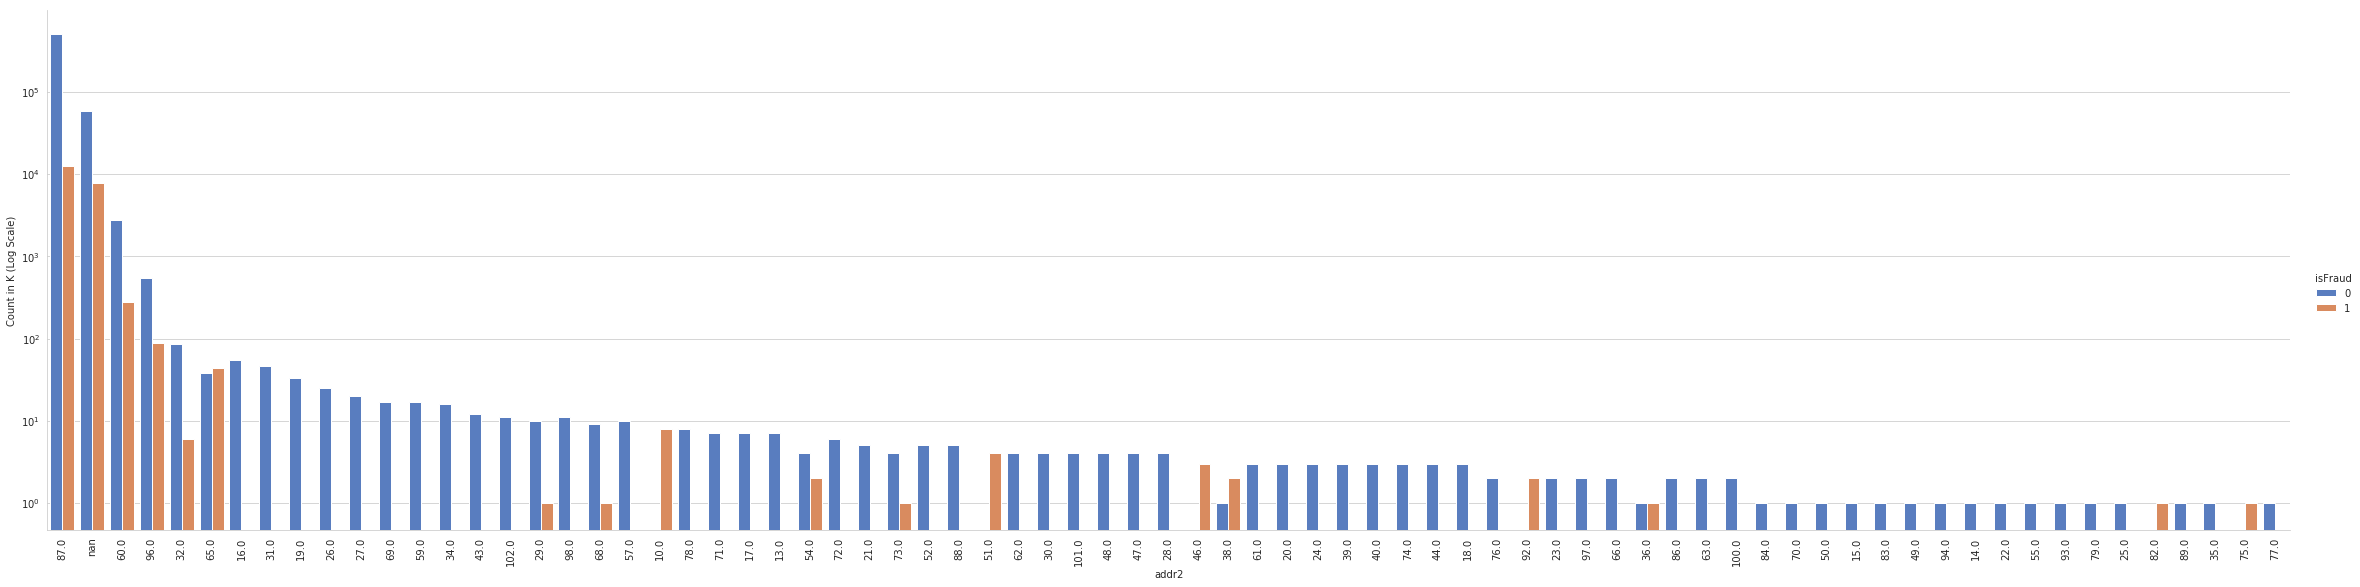

In [58]:
g = sns.factorplot(x="addr2", hue="isFraud", kind='count', orient='v',
                   data=df, palette="muted", log=True, order=df.addr2.value_counts().iloc[:75].index, size=8, aspect=4)

g.set_xticklabels(rotation=90)
plt.ylabel("Count in K (Log Scale)")  
g.fig.get_axes()[0].set_yscale('log')

This graph looks more clearer that the previous one, as many addresses look to have legit transactions and almost no fraud transactions. Some address like `51.0`, `46.0`, `92.0` have only fraudulent transactions, it appears.

**dist1**    
Even dist1/dist2 appear to be categorical variables. So, let us convert them to strings instead.

In [59]:
df['dist1'] = df.dist1.astype('str')
df['dist1'].fillna(value='nan', inplace=True)
print (df.dist1.unique().shape)
print (df.dist1.value_counts().head(20))

(2413,)
nan     352271
0.0      19824
1.0      18330
2.0      17028
4.0      13067
3.0      12808
5.0      12004
6.0       9843
7.0       9340
8.0       7731
9.0       7728
10.0      6288
11.0      6047
12.0      5384
14.0      4603
13.0      4559
15.0      3451
16.0      3390
18.0      2818
17.0      2766
Name: dist1, dtype: int64


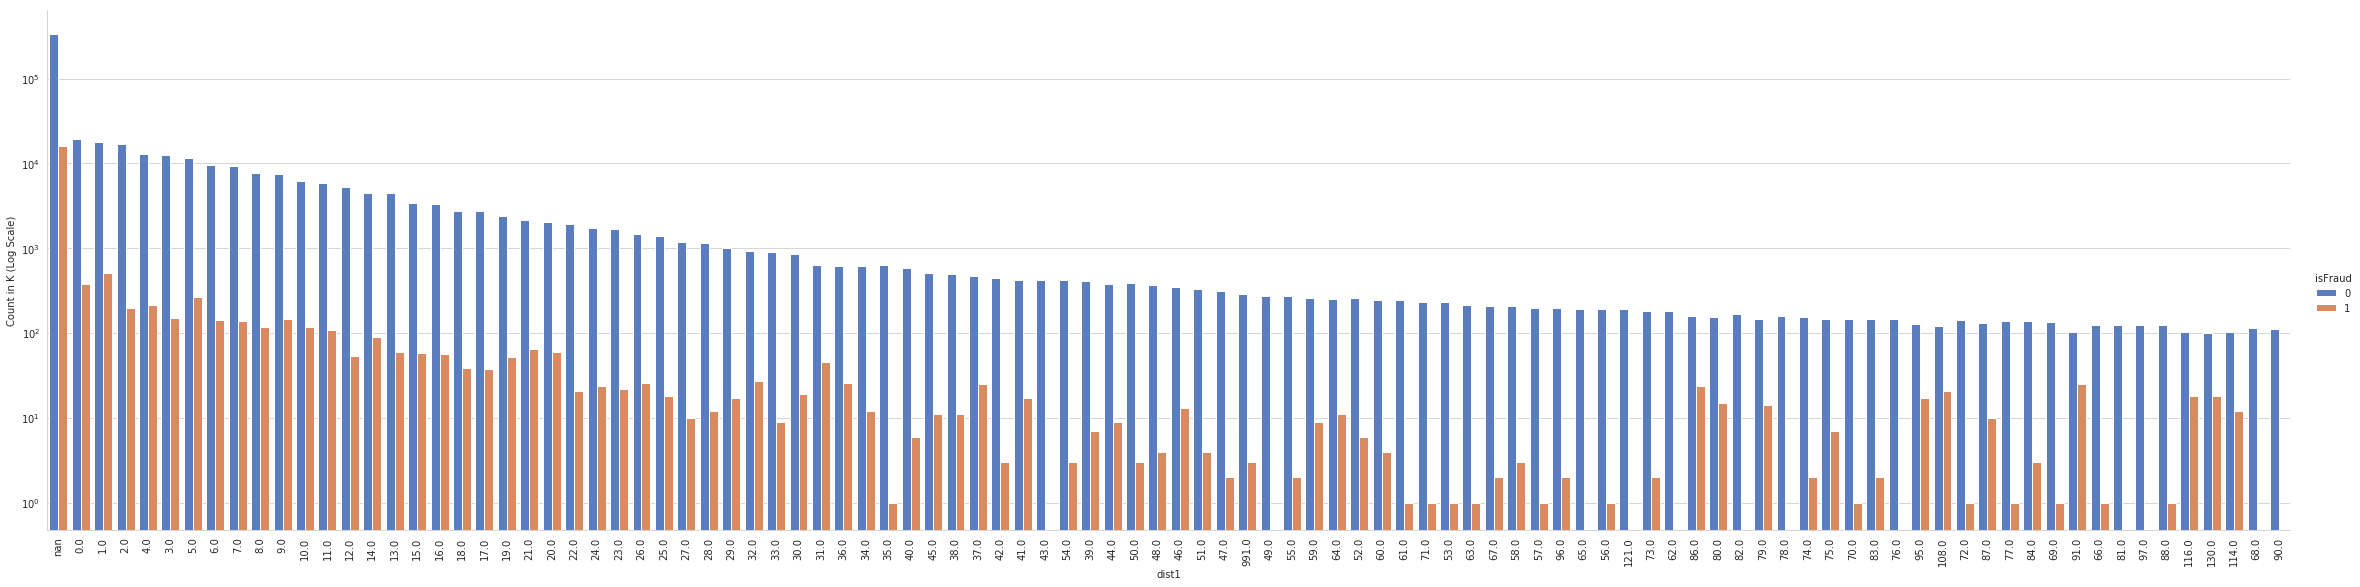

In [60]:
g = sns.factorplot(x="dist1", hue="isFraud", kind='count', orient='v',
                   data=df, palette="muted", log=True, order=df.dist1.value_counts().iloc[:100].index, size=8, aspect=4)

g.set_xticklabels(rotation=90)
plt.ylabel("Count in K (Log Scale)")  
g.fig.get_axes()[0].set_yscale('log')

In [61]:
df['dist2'] = df.dist2.astype('str')
df['dist2'].fillna(value='nan', inplace=True)
print (df.dist2.unique().shape)
print (df.dist2.value_counts().head(20))

(1700,)
nan      552913
7.0        5687
0.0        3519
1.0        1374
9.0         742
4.0         659
2.0         556
3.0         490
68.0        485
6.0         412
13.0        397
199.0       362
10.0        356
149.0       286
30.0        279
15.0        269
5.0         262
17.0        257
14.0        254
23.0        234
Name: dist2, dtype: int64


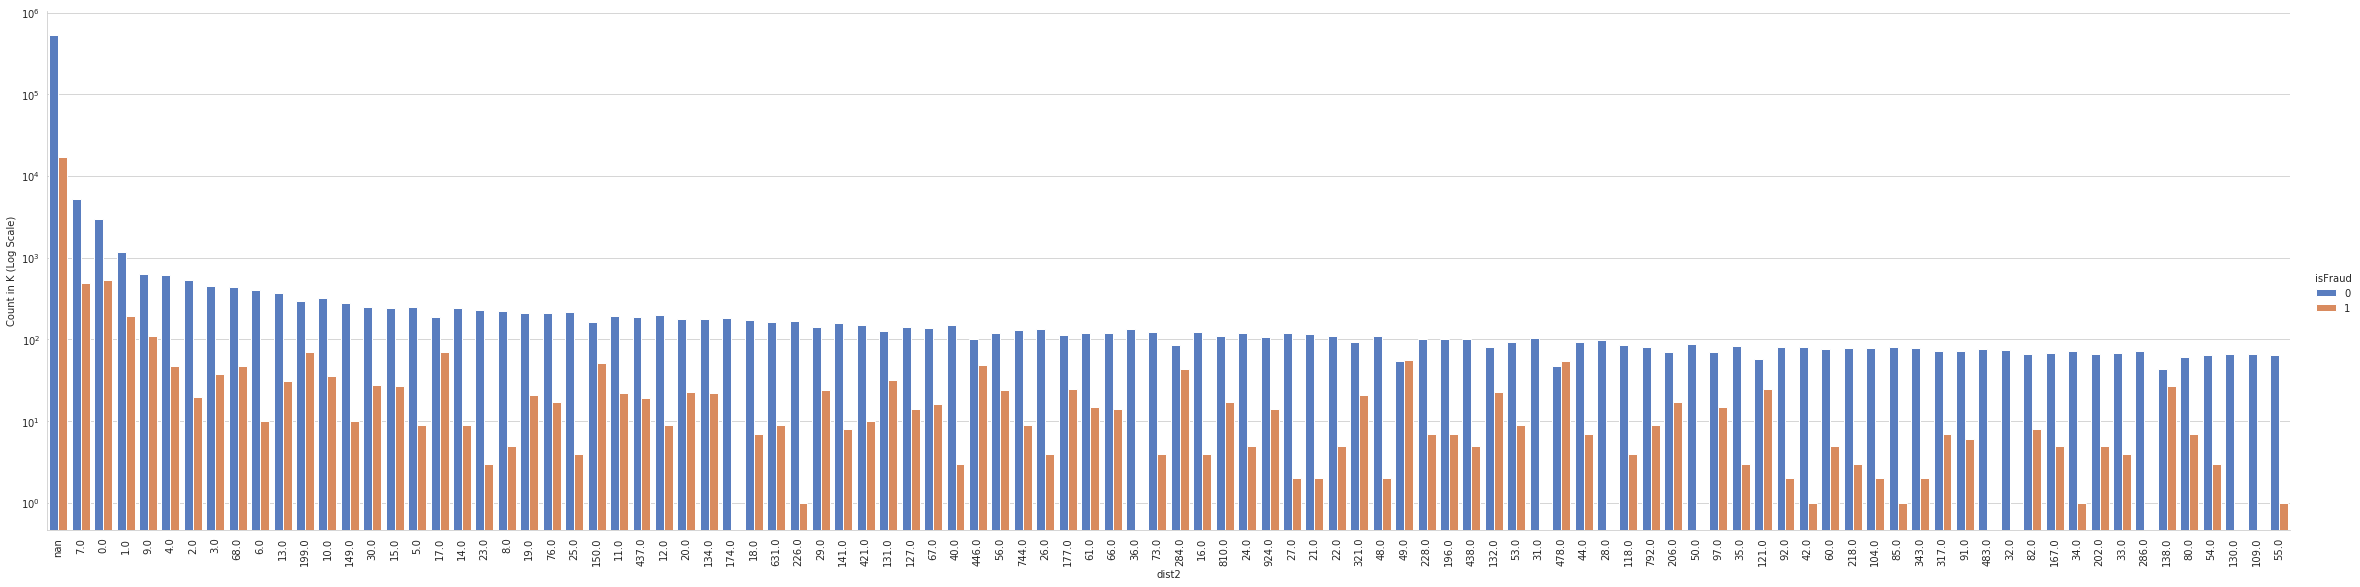

In [62]:
g = sns.factorplot(x="dist2", hue="isFraud", kind='count', orient='v',
                   data=df, palette="muted", log=True, order=df.dist2.value_counts().iloc[:100].index, size=8, aspect=4)

g.set_xticklabels(rotation=90)
plt.ylabel("Count in K (Log Scale)")  
g.fig.get_axes()[0].set_yscale('log')

Similar observations can be drawn for distributions of `dist1` and `dist2` graphs. Some, values do not have any fradulent transactions. (But this may not be the same case in the test data)

# Dealing with transaction time.   
Extract more features from transaction time

The training data appears to be of 183 days, so if we zoom in, we can see the periodicity of transactions. 

In [0]:
def hour_of_day(col):
  temp = col / (3600)
  temp = np.floor(temp) % 24
  return temp

In [0]:
temp = hour_of_day(df.TransactionDT)
df['hour_of_day'] = temp

(0, 24)

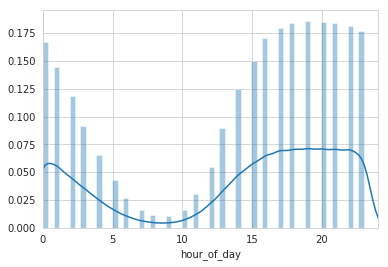

In [96]:
sns.distplot(a=df['hour_of_day'], bins=60)
plt.xlim(0, 24)

After encoding the time into a 24 hr format cyclical rounds, I found that according to the given time-zone, transactions spiked (now these are all transactions not just fradulent transactions) after 1500 hrs and stayed same till mid-night. Let's plot fradulent transactions and legit transactions separately.

In [97]:
df['hour_of_day'].corr(df['isFraud'])

-0.013112195075749086

Text(0.5, 1.0, 'Fraud Transactions')

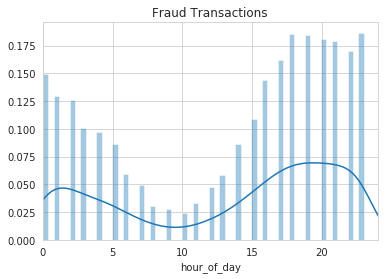

In [103]:
sns.distplot(a=df['hour_of_day'][df.isFraud==1], bins=60)
plt.xlim(0, 24)
plt.title('Fraud Transactions')

Text(0.5, 1.0, 'Legit Transactions')

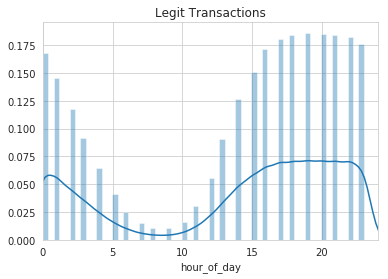

In [102]:
sns.distplot(a=df['hour_of_day'][df.isFraud==0], bins=60)
plt.xlim(0, 24)
plt.title('Legit Transactions')

**There seems to be a subtle difference between the Legit and fraud transactions, fraud transactions are more likely to occur in early morning slots slightly till 11 AM**   
Now Let's see what we catch with the transaction amount and the time of the transaction

In [105]:
df['hour_of_day'].corr(df['TransactionAmt'])

0.04453363285704813

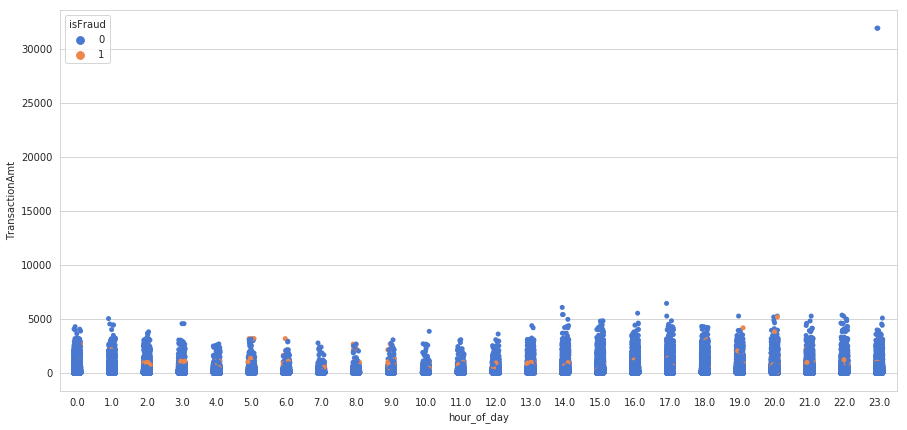

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)

g = sns.stripplot(x="hour_of_day", y='TransactionAmt', hue="isFraud",  
                   data=df.loc[], palette="muted", jitter=True)

#g.set_xticklabels(rotation=90)
#plt.ylabel("Count in K (Log Scale)")  
#g.fig.get_axes()[0].set_yscale('log')

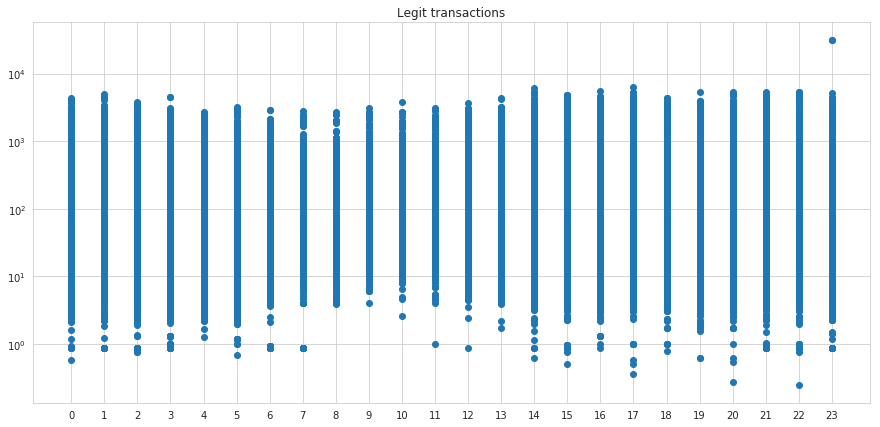

In [128]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)

color = np.random.rand(1)
plt.scatter(df.hour_of_day[df.isFraud == 0],df.TransactionAmt[df.isFraud == 0],  cmap="jet")
plt.gca().set_yscale('log')
plt.xticks(np.arange(24))
plt.title('Legit transactions')
plt.show()

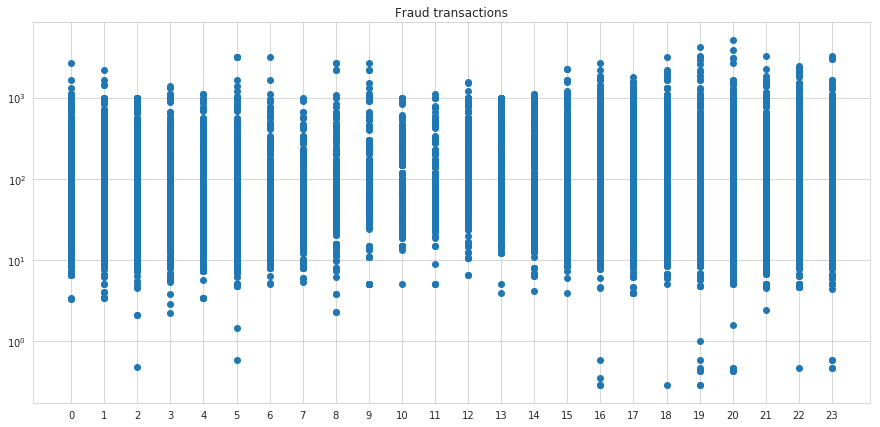

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)

color = np.random.rand(1)
plt.scatter(df.hour_of_day[df.isFraud == 1],df.TransactionAmt[df.isFraud == 1],  cmap="jet")
plt.gca().set_yscale('log')
plt.xticks(np.arange(24))
plt.title('Fraud transactions')
plt.show()

(0, 30)

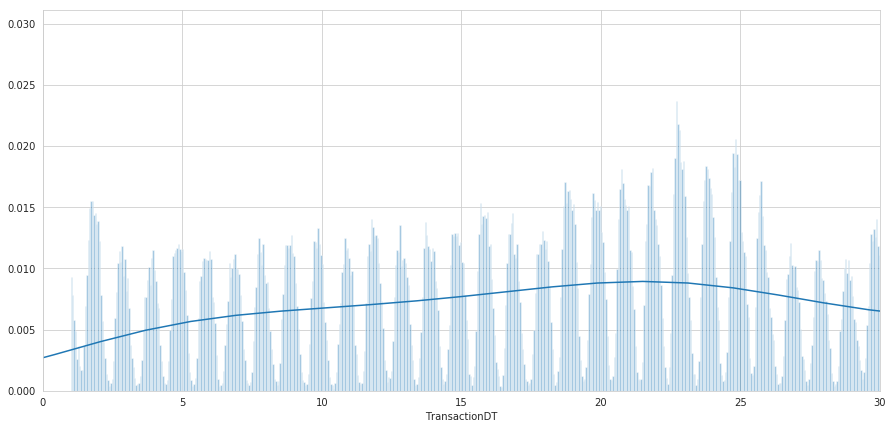

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)

sns.distplot(df['TransactionDT']/(3600*24), bins=3600)

plt.xlim(0, 30)

In [0]:
from fastai.tabular import transform

In [0]:
temp = df.copy(deep=True)

In [66]:
#transform.add_datepart(temp, 'TransactionDT')
print (temp.head())

   TransactionID DeviceType                     DeviceInfo  ...  dist1  dist2 isFraud
0        2987004     mobile  SAMSUNG SM-G892A Build/NRD90M  ...    nan    nan       0
1        2987008     mobile                     iOS Device  ...    nan    nan       0
2        2987010    desktop                        Windows  ...    nan    nan       0
3        2987011    desktop                             na  ...    nan   30.0       0
4        2987016    desktop                          MacOS  ...    nan    nan       0

[5 rows x 15 columns]


https://www.experian.com/blogs/ask-experian/the-history-of-credit-cards/#targetText=The%20modern%20payment%20card%20was,month's%20statement%20balance%20in%20full.

According first modern credit cards were used from 1980s so, if we take traditional conversion for dates, it starts from 1970. So, clearly the dates used here are from a random chunk of time (mostly recent times)

In [0]:
#sns.pairplot(df, hue='isFraud')